In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import backend.ann as nn 
import backend.layers as lyr
import backend.activations as activ
import backend.optimizers as optim
import backend.losses as losses
import backend.initializers as init

In [2]:
train2 = pd.read_csv('train2.txt', delimiter='\t', names=['x','y'])
train2.reset_index(drop=True, inplace=True)
train2= train2.to_numpy()
print(train2.shape)
train2x = train2[:,0,np.newaxis]
train2y = train2[:,1,np.newaxis]
print(train2x.shape, train2y.shape)

test2 = pd.read_csv('test2.txt', delimiter='\t', names=['x','y'])
test2.reset_index(drop=True, inplace=True)
test2 = test2.to_numpy()
print(test2.shape)
test2x = test2[:,0,np.newaxis]
test2y = test2[:,1,np.newaxis]
print(test2x.shape, test2y.shape)

#normalize
train2xNor = (train2x - np.mean(train2x))/np.std(train2x)
train2yNor = (train2y - np.mean(train2y))/np.std(train2y)
test2xNor = (test2x - np.mean(train2x))/np.std(train2x)
test2yNor = (test2y - np.mean(train2y))/np.std(train2y)

(229, 2)
(229, 1) (229, 1)
(92, 2)
(92, 1) (92, 1)



Layer 0: Input Dim: 1, Number of Neurons: 1 Activation: linear



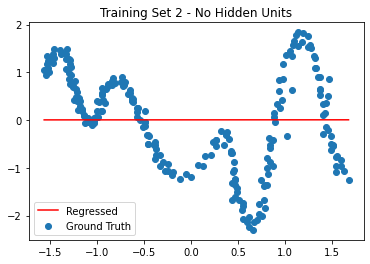

mean 1.000343725245684
std 1.12013327265386


In [3]:
model = nn.ANNRegressor()
layers = []
layers.append(lyr.Dense(train2xNor.shape[1], 1, activation=activ.Linear(), 
                        kernel_initializer=init.RandomUniform(minval=-0.005, maxval=0.005),
                         bias_initializer=init.RandomUniform(minval=-0.005, maxval=0.005)))

model(layers)

print(model)

opt = optim.Momentum(lr = 0.01, momentum = 0.1)
loss = losses.MSE()
metrics = ['train_loss']

model.compile(optimizer=opt, loss=loss, metrics=metrics)

plt.scatter(train2xNor, train2yNor)
result_x_train = np.linspace(np.min(train2xNor), np.max(train2xNor), 100)[:,np.newaxis]
result_y_train = model.forward(result_x_train)
plt.plot(result_x_train, result_y_train, color='red')
plt.legend(['Regressed','Ground Truth'])
plt.title('Training Set 2 - No Hidden Units')
plt.show()

result_y = model.forward(train2xNor)
print('mean', np.mean((result_y - train2yNor)**2))
print('std', np.std((result_y - train2yNor)**2))


Layer 0: Input Dim: 1, Number of Neurons: 2 Activation: tanh
Layer 1: Input Dim: 2, Number of Neurons: 1 Activation: linear



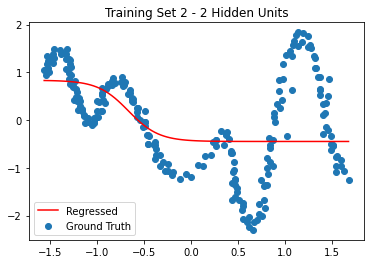

mean 0.7402380559176522
std 1.1531819557845602


In [4]:
model1 = nn.ANNRegressor()
layers = []
layers.append(lyr.Dense(train2xNor.shape[1], 2, activation=activ.Tanh(), 
                        kernel_initializer=init.RandomUniform(minval=-0.0005, maxval=0.0005),
                         bias_initializer=init.RandomUniform(minval=-0.0005, maxval=0.0005)))
layers.append(lyr.Dense(2, 1, activation=activ.Linear(), 
                        kernel_initializer=init.RandomUniform(minval=-0.0005, maxval=0.0005),
                         bias_initializer=init.RandomUniform(minval=-0.0005, maxval=0.0005)))
model1(layers)

print(model1)

opt = optim.Momentum(lr = 0.01, momentum=0.1)
loss = losses.MSE()
metrics = ['train_loss']

model1.compile(optimizer=opt, loss=loss, metrics=metrics)

hist = model1.train(train2xNor, train2yNor, epochs=15000, batch_size=1, verbose=False, stopping_loss=0.35)

plt.scatter(train2xNor, train2yNor)
result_x_train = np.linspace(np.min(train2xNor), np.max(train2xNor), 100)[:,np.newaxis]
result_y_train = model1.forward(result_x_train)
plt.plot(result_x_train, result_y_train, color='red')
plt.legend(['Regressed','Ground Truth'])
plt.title('Training Set 2 - 2 Hidden Units')
plt.show()

result_y = model1.forward(train2xNor)
print('mean', np.mean((result_y - train2yNor)**2))
print('std', np.std((result_y - train2yNor)**2))


Layer 0: Input Dim: 1, Number of Neurons: 4 Activation: tanh
Layer 1: Input Dim: 4, Number of Neurons: 1 Activation: linear

Epoch: 412
Train loss: 0.333
Stopping criterion reached.


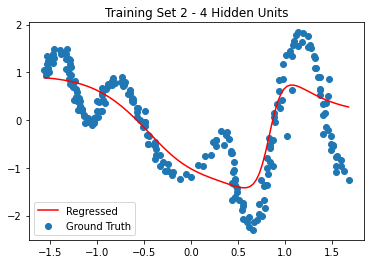

mean 0.33321374901665907
std 0.4085915697365184


In [5]:
model2 = nn.ANNRegressor()
layers = []
layers.append(lyr.Dense(train2xNor.shape[1], 4, activation=activ.Tanh(), 
                        kernel_initializer=init.RandomUniform(minval=-0.0005, maxval=0.0005),
                         bias_initializer=init.RandomUniform(minval=-0.0005, maxval=0.0005)))
layers.append(lyr.Dense(4, 1, activation=activ.Linear(), 
                        kernel_initializer=init.RandomUniform(minval=-0.0005, maxval=0.0005),
                         bias_initializer=init.RandomUniform(minval=-0.0005, maxval=0.0005)))
model2(layers)

print(model2)

opt = optim.Momentum(lr = 0.01, momentum=0.1)
loss = losses.MSE()
metrics = ['train_loss']

model2.compile(optimizer=opt, loss=loss, metrics=metrics)

hist = model2.train(train2xNor, train2yNor, epochs=15000, batch_size=1, verbose=False, stopping_loss=0.35)
plt.scatter(train2xNor, train2yNor)
result_x_train = np.linspace(np.min(train2xNor), np.max(train2xNor), 100)[:,np.newaxis]
result_y_train = model2.forward(result_x_train)
plt.plot(result_x_train, result_y_train, color='red')
plt.legend(['Regressed','Ground Truth'])
plt.title('Training Set 2 - 4 Hidden Units')
plt.show()

result_y = model2.forward(train2xNor)
print('mean', np.mean((result_y - train2yNor)**2))
print('std', np.std((result_y - train2yNor)**2))


Layer 0: Input Dim: 1, Number of Neurons: 8 Activation: tanh
Layer 1: Input Dim: 8, Number of Neurons: 1 Activation: linear

Epoch: 1029
Train loss: 0.198
Stopping criterion reached.


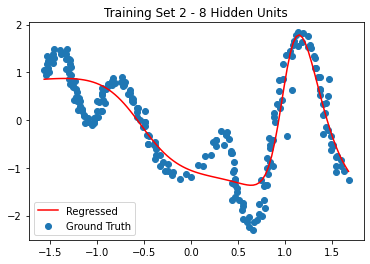

mean 0.19828727408382849
std 0.2597569559729348


In [6]:
model3 = nn.ANNRegressor()
layers = []
layers.append(lyr.Dense(train2xNor.shape[1], 8, activation=activ.Tanh(), 
                        kernel_initializer=init.RandomUniform(minval=-0.0005, maxval=0.0005),
                         bias_initializer=init.RandomUniform(minval=-0.0005, maxval=0.0005)))
layers.append(lyr.Dense(8, 1, activation=activ.Linear(), 
                        kernel_initializer=init.RandomUniform(minval=-0.0005, maxval=0.0005),
                         bias_initializer=init.RandomUniform(minval=-0.0005, maxval=0.0005)))
model3(layers)

print(model3)

opt = optim.Momentum(lr = 0.01, momentum=0.1)
loss = losses.MSE()
metrics = ['train_loss']

model3.compile(optimizer=opt, loss=loss, metrics=metrics)

hist = model3.train(train2xNor, train2yNor, epochs=10000, batch_size=1, verbose=False, stopping_loss=0.2)

plt.scatter(train2xNor, train2yNor)
result_x_train = np.linspace(np.min(train2xNor), np.max(train2xNor), 100)[:,np.newaxis]
result_y_train = model3.forward(result_x_train)
plt.plot(result_x_train, result_y_train, color='red')
plt.legend(['Regressed','Ground Truth'])
plt.title('Training Set 2 - 8 Hidden Units')
plt.show()

result_y = model3.forward(train2xNor)
print('mean', np.mean((result_y - train2yNor)**2))
print('std', np.std((result_y - train2yNor)**2))


Layer 0: Input Dim: 1, Number of Neurons: 16 Activation: tanh
Layer 1: Input Dim: 16, Number of Neurons: 1 Activation: linear

Epoch: 4602
Train loss: 0.097
Stopping criterion reached.


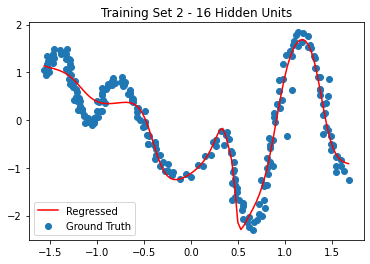

mean 0.09701341692587032
std 0.19020354338399884


In [7]:
model4 = nn.ANNRegressor()
layers = []
layers.append(lyr.Dense(train2xNor.shape[1], 16, activation=activ.Tanh(), 
                        kernel_initializer=init.RandomUniform(minval=-0.0005, maxval=0.0005),
                         bias_initializer=init.RandomUniform(minval=-0.0005, maxval=0.0005)))
layers.append(lyr.Dense(16, 1, activation=activ.Linear(), 
                        kernel_initializer=init.RandomUniform(minval=-0.0005, maxval=0.0005),
                         bias_initializer=init.RandomUniform(minval=-0.0005, maxval=0.0005)))
model4(layers)

print(model4)

opt = optim.Momentum(lr = 0.01, momentum=0.1)
loss = losses.MSE()
metrics = ['train_loss']

model4.compile(optimizer=opt, loss=loss, metrics=metrics)

hist = model4.train(train2xNor, train2yNor, epochs=20000, batch_size=1, verbose=False, stopping_loss=0.1)


plt.scatter(train2xNor, train2yNor)
result_x_train = np.linspace(np.min(train2xNor), np.max(train2xNor), 100)[:,np.newaxis]
result_y_train = model4.forward(result_x_train)
plt.plot(result_x_train, result_y_train, color='red')
plt.legend(['Regressed','Ground Truth'])
plt.title('Training Set 2 - 16 Hidden Units') 
plt.show()

result_y = model4.forward(train2xNor)
print('mean', np.mean((result_y - train2yNor)**2))
print('std', np.std((result_y - train2yNor)**2))

result_y = model4.forward(test2xNor)
print('mean', np.mean((result_y - test2yNor)**2))
print('std', np.std((result_y - test2yNor)**2))

In [8]:
result_y = model.forward(test2xNor)
print('mean', np.mean((result_y - test2yNor)**2))
print('std', np.std((result_y - test2yNor)**2))
result_y = model1.forward(test2xNor)
print('mean', np.mean((result_y - test2yNor)**2))
print('std', np.std((result_y - test2yNor)**2))
result_y = model2.forward(test2xNor)
print('mean', np.mean((result_y - test2yNor)**2))
print('std', np.std((result_y - test2yNor)**2))
result_y = model3.forward(test2xNor)
print('mean', np.mean((result_y - test2yNor)**2))
print('std', np.std((result_y - test2yNor)**2))
result_y = model4.forward(test2xNor)
print('mean', np.mean((result_y - test2yNor)**2))
print('std', np.std((result_y - test2yNor)**2))

mean 1.0120336693993635
std 1.0424935427887714
mean 0.8196279591272205
std 1.1280334423915384
mean 0.4653119946317307
std 0.5647782682512427
mean 0.3427738452821091
std 0.4950098587865676
mean 0.2033847102998007
std 0.32490067604802214
